# Linear regression (GLM - Generalized Linear Model) in PyMC3

$ \text{Y} \sim \text{Normal}(X\beta, \sigma^2 ) $  

Where Y is a normally distributed random variable with the linear predictor as its mean and variance equal to $\sigma^2$


In [11]:
#import the required modules.
%matplotlib inline
from pymc3 import  *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Simple example in PyMC3

Sources:   
http://twiecki.github.io/  
https://pymc-devs.github.io/pymc3/notebooks/GLM-linear.html

In [43]:
# Generating data
size = 200
true_intercept = 1
true_slope = 2
x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)
data = dict(x=x, y=y)


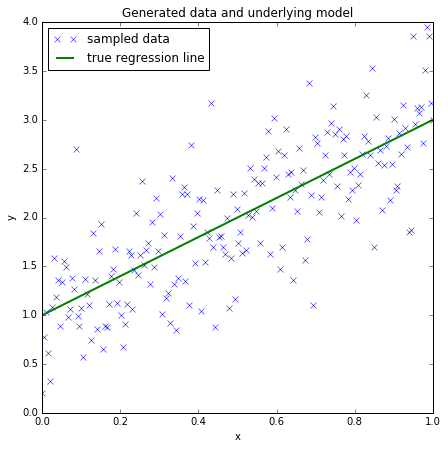

In [44]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [45]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.glm('y ~ x', data)
    start = find_MAP()
    step = NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = sample(1000, step, progressbar=False) # draw 2000 posterior samples using NUTS sampling

Applied log-transform to sd and added transformed sd_log_ to model.


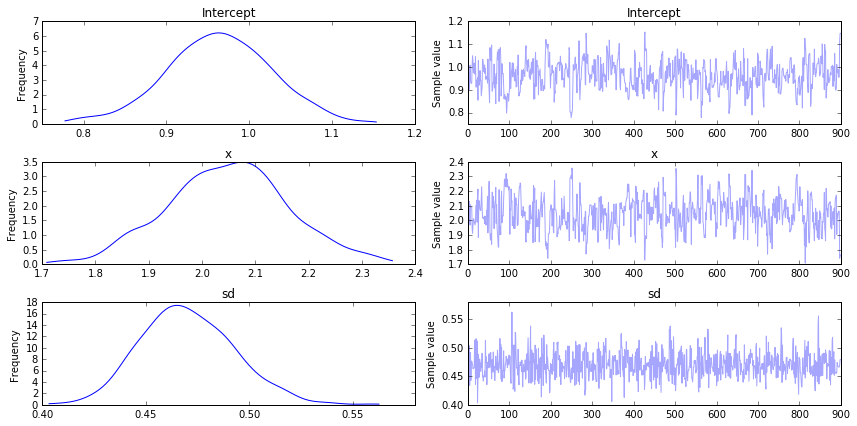

In [46]:
# Analyzing the model
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

The left side shows our marginal posterior – for each parameter value on the x-axis we get a probability on the y-axis that tells us how likely that parameter value is.

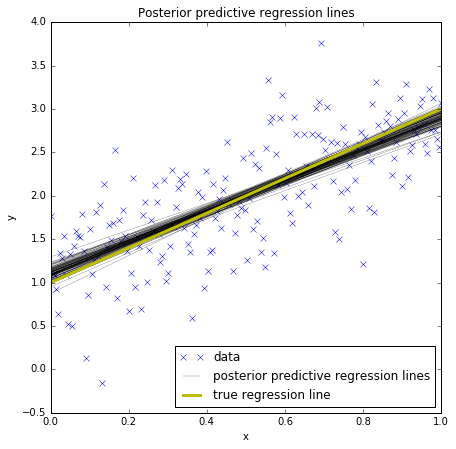

In [8]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
glm.plot_posterior_predictive(trace, samples=100,
                              label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

# House Price. (Kaggle-Playground)

Find the data here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques   
Find the data exploration and analysis here: https://rpubs.com/Ludovicbenistant/HousePrice   
Here I will use only a small subset.  

Our goal is to find the best value of $ \text{Y} \sim \text{Normal}(Xβ, \sigma^2 ) $  given the data we have.

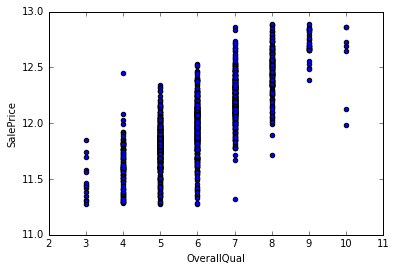

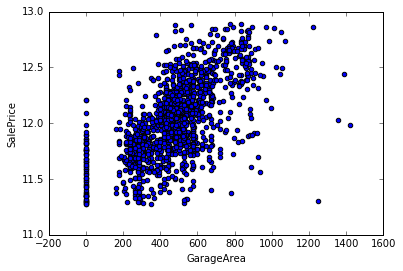

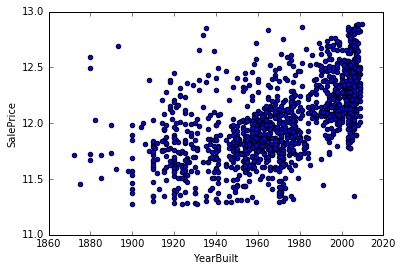

In [49]:
# Test new data (house from Kaggle)
houseprice = pd.read_csv("houseprice.csv")

# Let's plot our 3 variables
houseprice.plot(kind='scatter', x='OverallQual', y='SalePrice');
houseprice.plot(kind='scatter', x='GarageArea', y='SalePrice');
houseprice.plot(kind='scatter', x='YearBuilt', y='SalePrice');


### Model with only one variable (as above)

In [50]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.glm('SalePrice ~ OverallQual', houseprice)
    start = find_MAP()
    step = NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = sample(1000, step, progressbar=False) # draw 1000 posterior samples using NUTS sampling

Applied log-transform to sd and added transformed sd_log_ to model.


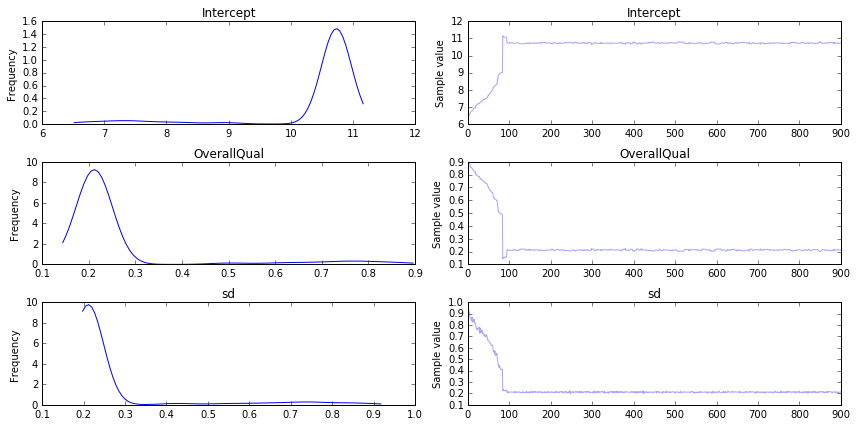

In [51]:
# Analyzing the model
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

### Model including the 3 variables

In [54]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.glm('SalePrice ~ GarageArea + OverallQual + YearBuilt', houseprice)
    start = find_MAP()
    step = NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = sample(200, step, progressbar=False) # draw 200 posterior samples using NUTS sampling

Applied log-transform to sd and added transformed sd_log_ to model.


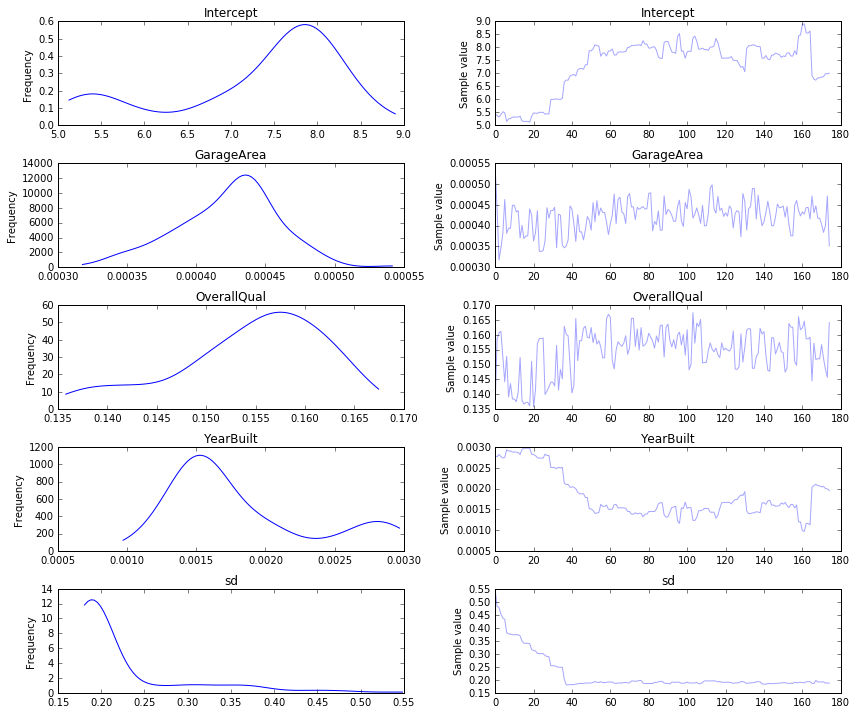

In [55]:
# Analyzing the model
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();